import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
data=pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.drop(labels=["nameOrig","nameDest"],axis=1,inplace=True)

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
data.isnull().any()

step              False
type              False
amount            False
oldbalanceOrg     False
newbalanceOrig    False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [9]:
data.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)

In [10]:
print(data.duplicated().sum())
data=data.drop_duplicates()

543


In [11]:
data.shape

(6362077, 9)

<Axes: xlabel='type', ylabel='amount'>

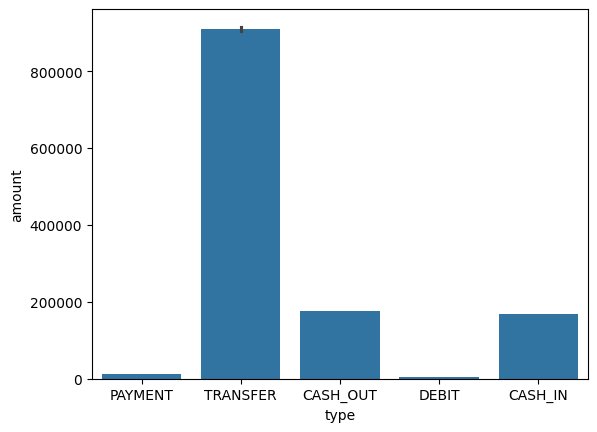

In [12]:
sns.barplot(x='type',y='amount',data=data)

In [13]:
data.loc[data.isFraud==1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

<Axes: >

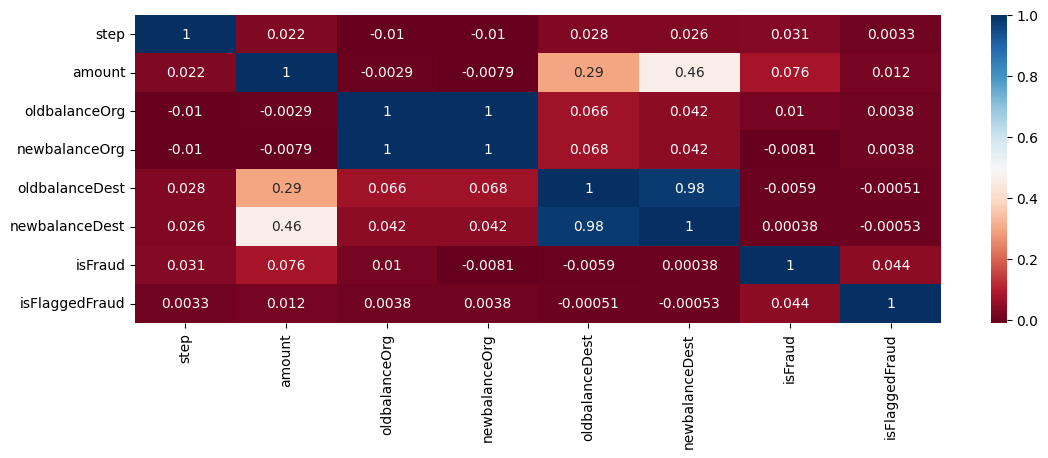

In [14]:
data.select_dtypes(include=[float, int])
plt.figure(figsize=(13,4))
sns.heatmap(data.select_dtypes(include=[float, int]).corr(),cmap='RdBu',annot=True)

In [15]:
type_new=pd.get_dummies(data['type'],drop_first=True)
data_new=pd.concat([data,type_new],axis=1)
data_new['CASH_OUT'] = data_new['CASH_OUT'].astype(int)
data_new['DEBIT'] = data_new['DEBIT'].astype(int)
data_new['PAYMENT'] = data_new['PAYMENT'].astype(int)
data_new['TRANSFER'] = data_new['TRANSFER'].astype(int)
data_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [16]:
fraud=data_new.loc[data.isFraud==1].copy()
notfraud=data_new.loc[data.isFraud==0].copy()
fraud.drop(labels=["type"],axis=1,inplace=True)
notfraud.drop(labels=["type"],axis=1,inplace=True)
fraud.head()

,step,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
2,1,181.0,181.0,0.0,0.0,0.0,1,0,0,0,0,1
3,1,181.0,181.0,0.0,21182.0,0.0,1,0,1,0,0,0
251,1,2806.0,2806.0,0.0,0.0,0.0,1,0,0,0,0,1
252,1,2806.0,2806.0,0.0,26202.0,0.0,1,0,1,0,0,0
680,1,20128.0,20128.0,0.0,0.0,0.0,1,0,0,0,0,1


In [17]:
fraud_count=fraud.isFraud.count()
notfraud_count=notfraud.isFraud.count()

<Axes: >

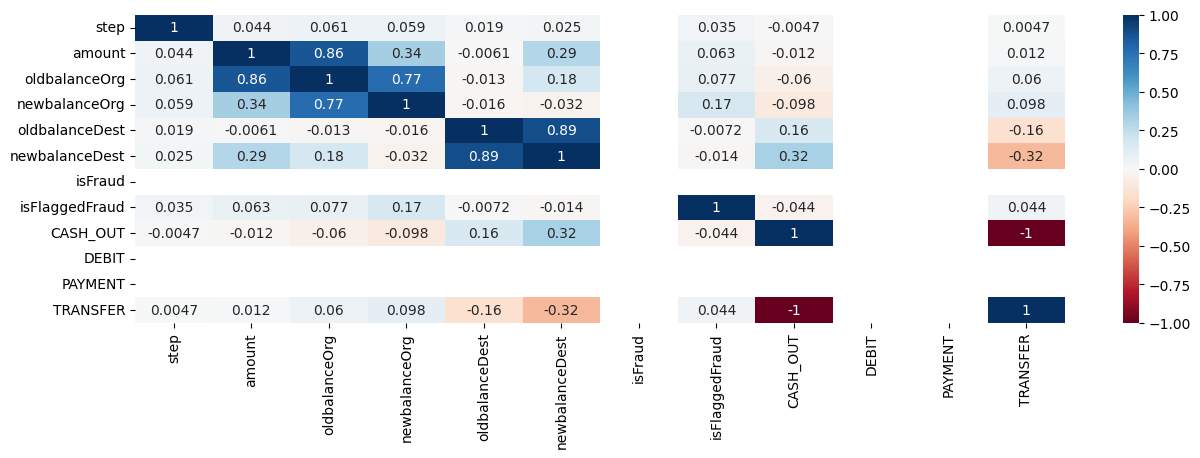

In [18]:
plt.figure(figsize=[15,4])
sns.heatmap(fraud.select_dtypes(include=[float, int]).corr(),cmap='RdBu',annot=True)

In [19]:
print('Total fraud transactions{}'.format(data.isFraud.sum()))
print('Total no. transactions marked as fraud{}'.format(data.isFlaggedFraud.sum()))
print('Ratio of fraud vs non fraud transaction is 1:{}'.format(int(notfraud_count//fraud_count)))

Total fraud transactions8197
Total no. transactions marked as fraud16
Ratio of fraud vs non fraud transaction is 1:775


In [20]:
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Amount lost due to these fraud transaction is $11906415427.


In [21]:
piedata=fraud.groupby(['isFlaggedFraud']).sum()

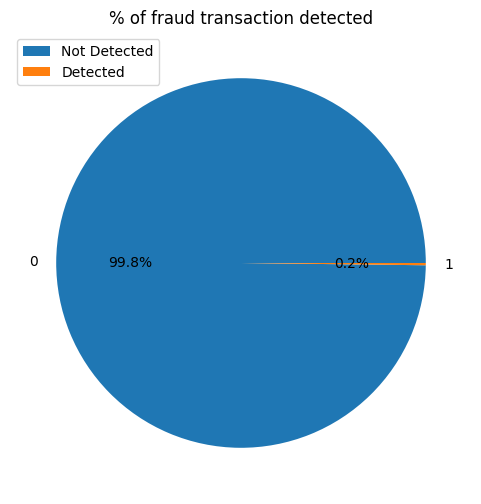

In [22]:
f,axes=plt.subplots(1,1,figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes,fontsize=10,autopct='%1.1f%%')
axes.set_ylabel('')
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

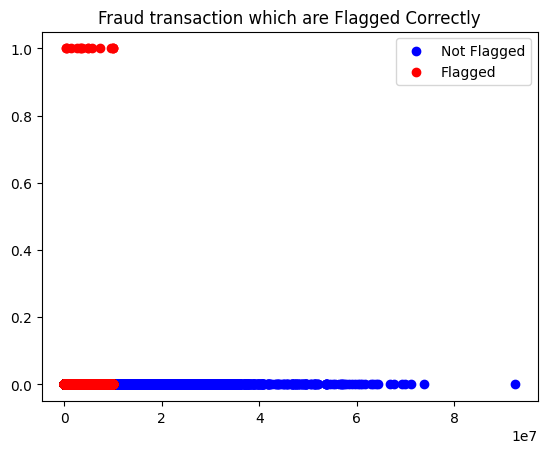

In [23]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(notfraud['amount'],notfraud['isFlaggedFraud'],c='blue')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='red')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

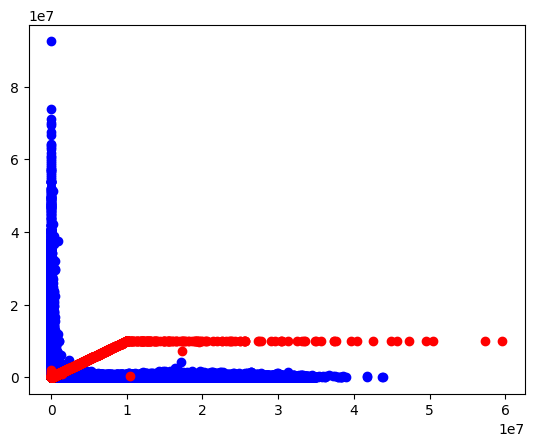

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(notfraud['oldbalanceOrg'],notfraud['amount'],c='blue')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='red')
plt.show()

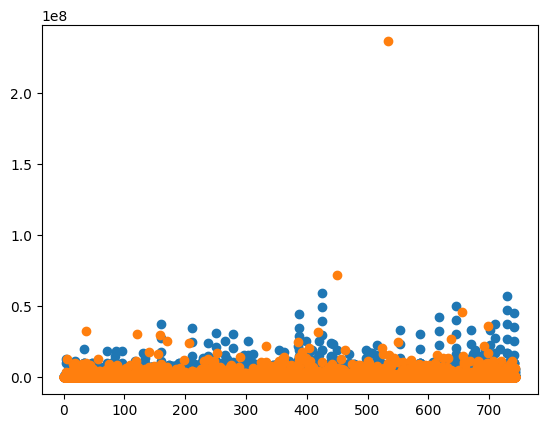

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

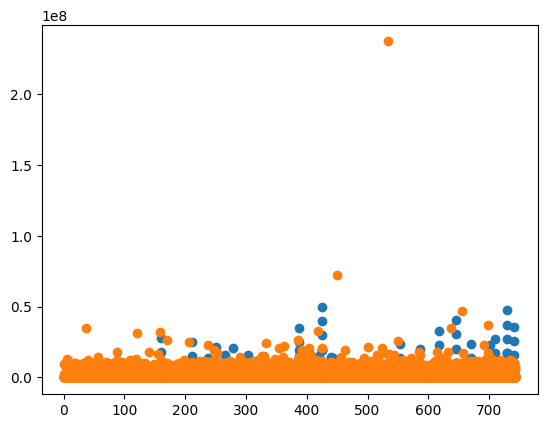

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

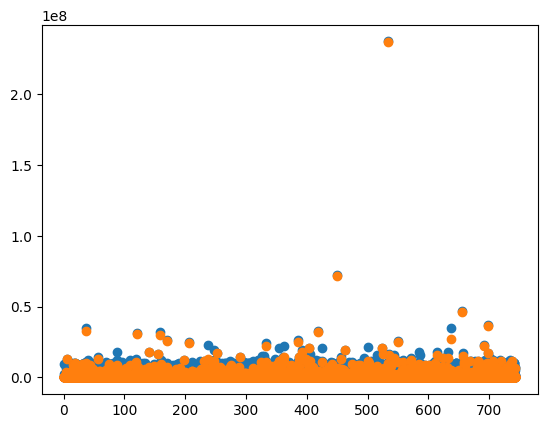

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

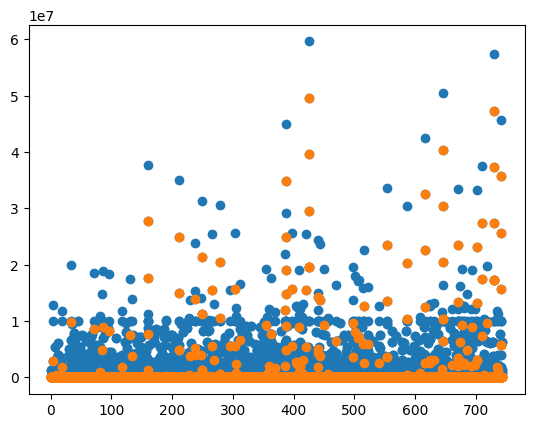

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
plt.show()

In [29]:
import pickle

In [30]:
data = data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [31]:
data.drop(['isFlaggedFraud'],axis=1,inplace=True)

In [32]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [33]:
X = data.drop(['isFraud'],axis=1)
y = data[['isFraud']]

In [34]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [36]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [37]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))

0.7821447663977744


*Approx precision value is 0.7821144*